# 20th Century Book and Their Movie Adaptations
Exploration of the popularity of titles around the time of their publication and movie adaptation.

By Kenneth Yang

<a target="_blank" href="https://colab.research.google.com/github/kjy5/twentieth-century-movie-adaptations/blob/main/src/twentieth_century_movie_adaptations/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Introduction
## What are we looking for?
- 📖 How did a title's popularity trend when it was published?
- 🎥 How did a title's popularity trend when it was adapted into a movie?
- 📈 Did the movie adaptation leave a net increase in popularity of the title?

## What is Google Ngram Viewer and why are we using it?
- 🔎 [Google Books Ngram Viewer](https://books.google.com/ngrams/)
- 📰 20th century: most talk is through books, newspapers, and magazines. Works as a proxy for popularity.
- 📊 Makes pretty graphs for us to look at.

# Data Collection
- Define books, their publication dates, and their movie adaptations.
- Pull the data from Google Ngram Viewer.

## Publication dates of books and their movie adaptations

In [72]:
from collections import namedtuple

# Define a type to hold the publication dates of a book and its movie adaptation.
Published = namedtuple("Published", ["book", "movie"])

In [73]:
BOOKS = {
    "Gone with the Wind": Published(1936, 1939),
    "The Grapes of Wrath": Published(1939, 1940),
    "The Maltese Falcon": Published(1930, 1941),
    "To Kill a Mockingbird": Published(1960, 1962),
    "One Flew Over the Cuckoo's Nest": Published(1962, 1975),
    "The Godfather": Published(1969, 1972),
    "A Clockwork Orange": Published(1962, 1971),
}

# Define the start and end years for the data collection (limited to [1800, 2022]).
START_YEAR = 1900
END_YEAR = 2000

## Pull data from Google Ngram Viewer

In [74]:
from requests import get


def json_url(title: str, start, end):
    return f"https://books.google.com/ngrams/json?content={title.replace(" ", "+")}&year_start={start}&year_end={end}&corpus=en&smoothing=0&case_insensitive=true"

In [75]:
responses = {}
for book in BOOKS:
    # Pull from Google Ngram Viewer.
    response = get(json_url(book, START_YEAR, END_YEAR))

    # Check for errors.
    response.raise_for_status()

    # Only keep the first timeseries data (the case-insensitive one).
    responses[book] = response.json()[0]["timeseries"]

## Compute the popularity trends.
This is the numerical derivatives of the Ngram from year to year.

In [76]:
from numpy import diff

trends = {}
for book, data in responses.items():
    trends[book] = diff(data)

# Display the Data

In [77]:
from IPython.display import IFrame, display
from matplotlib.pyplot import figure, plot, axvline, xlabel, ylabel, title, legend, show
from numpy import arange


def print_book_info(book_title: str):
    print(f"Book: {book_title}")
    print(f"\tPublished: {BOOKS[book_title].book}")
    print(f"\tMovie Adaptation: {BOOKS[book_title].movie}")


def ngram_graph(book_title: str, start, end) -> IFrame:
    # Convert the JSON data URL to an interactive chart URL.
    iframe_url = json_url(book_title, start, end).replace("json", "interactive_chart", 1)
    
    # Create said chart.
    return IFrame(iframe_url, width=900, height=350)


def roc_graph(book_title: str, start, end):
    # Create a line graph with the rate of change of the title's popularity.
    years = arange(start, end)
    figure(figsize=(12, 5))
    plot(years, trends[book_title], label="Rate of Change")

    # Add reference lins for the publication and movie adaptation years.
    axvline(x=BOOKS[book_title].book, color="red", linestyle="--", alpha=0.25, label="Book Published")
    axvline(x=BOOKS[book_title].movie, color="green", linestyle="--", alpha=0.25, label="Movie Adapted")

    # Add labels and title.
    xlabel("Year")
    ylabel("Rate of Change")
    title(f"Popularity Rate of Change of {book_title}")
    legend()
    
    # Display the graph.
    show()


def display_info(book_title: str):
    print_book_info(book_title)
    display(ngram_graph(book_title, START_YEAR, END_YEAR))
    roc_graph(book_title, START_YEAR, END_YEAR)

Book: Gone with the Wind
	Published: 1936
	Movie Adaptation: 1939


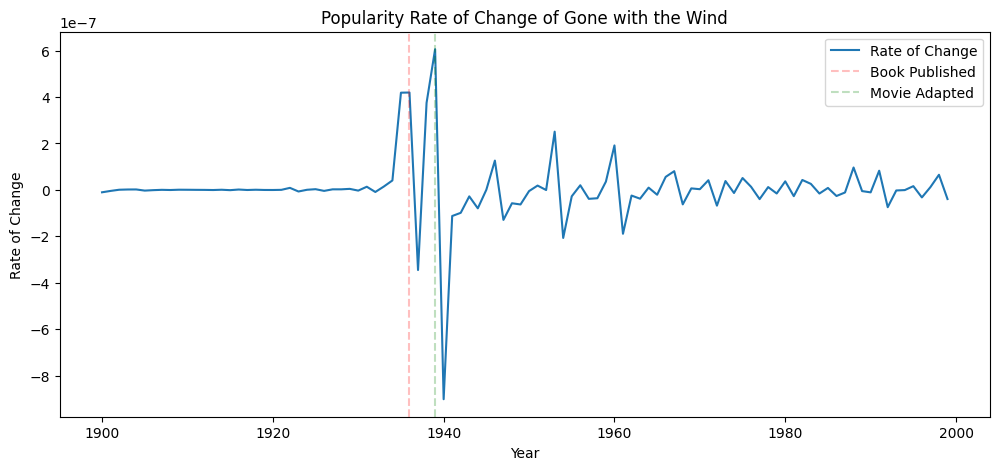

----------------------
Book: The Grapes of Wrath
	Published: 1939
	Movie Adaptation: 1940


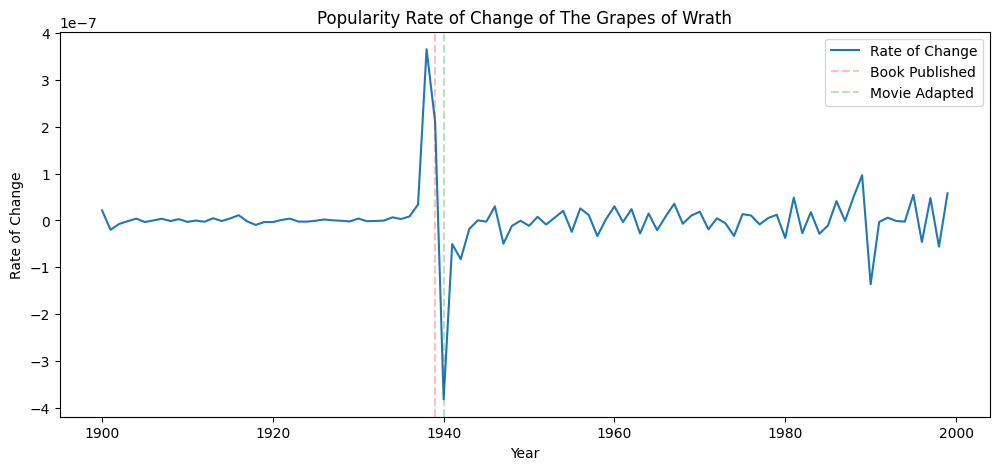

----------------------
Book: The Maltese Falcon
	Published: 1930
	Movie Adaptation: 1941


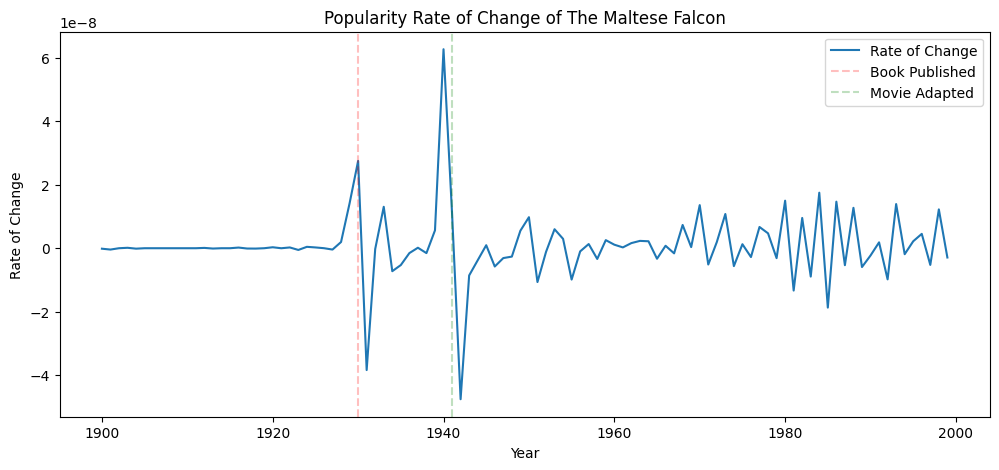

----------------------
Book: To Kill a Mockingbird
	Published: 1960
	Movie Adaptation: 1962


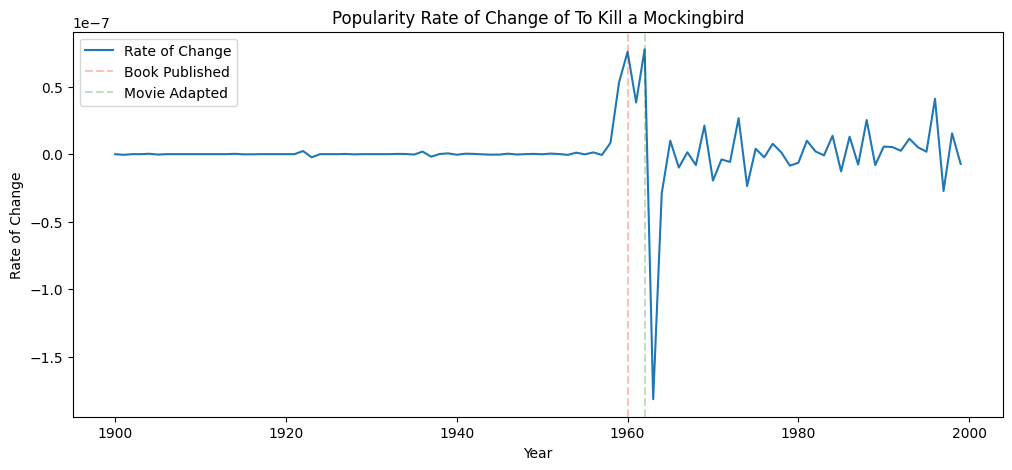

----------------------
Book: One Flew Over the Cuckoo's Nest
	Published: 1962
	Movie Adaptation: 1975


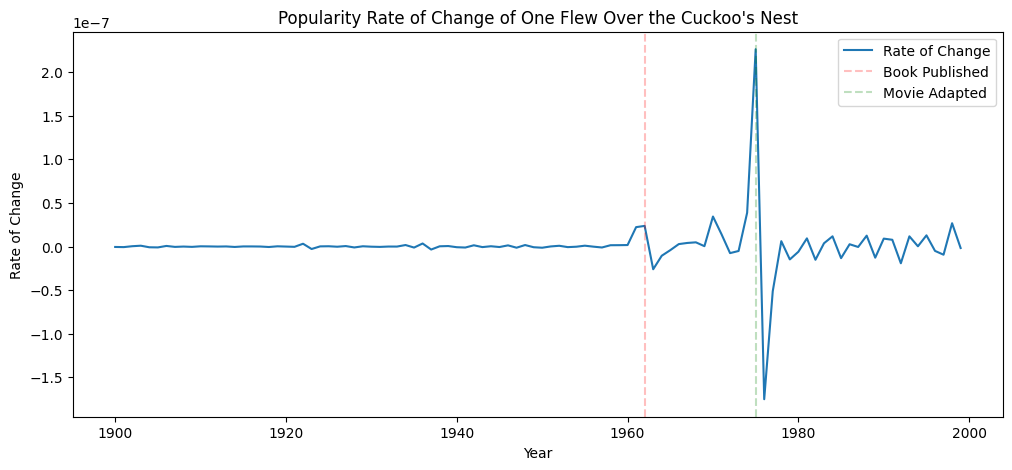

----------------------
Book: The Godfather
	Published: 1969
	Movie Adaptation: 1972


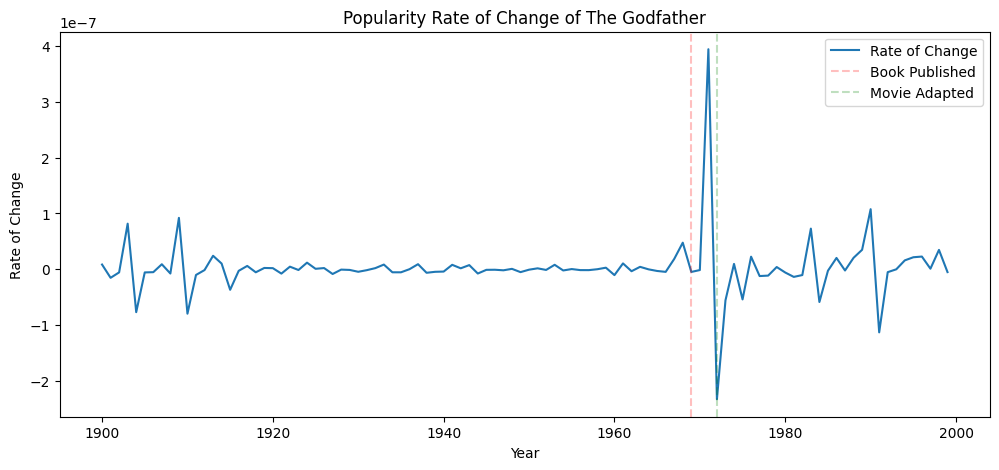

----------------------
Book: A Clockwork Orange
	Published: 1962
	Movie Adaptation: 1971


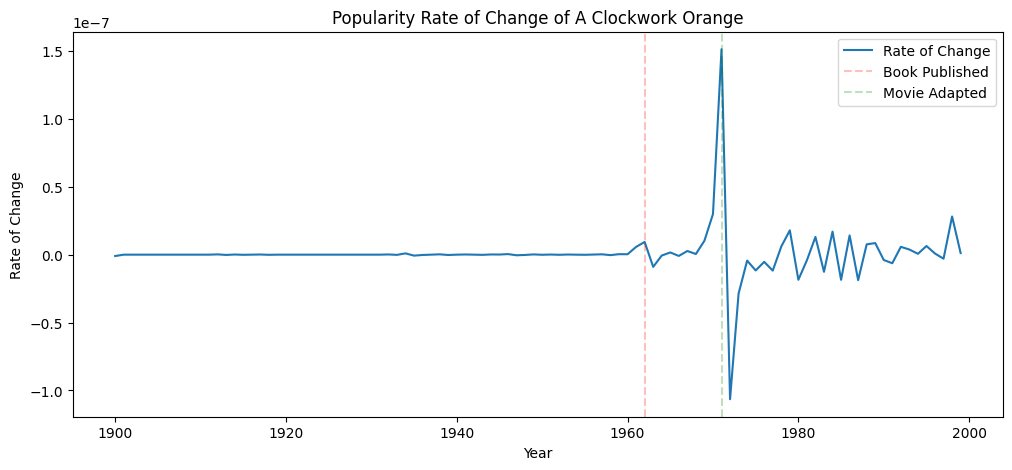

----------------------


In [78]:
for book in BOOKS:
    display_info(book)
    print("----------------------")

# Thanks!
## Questions?

Try it yourself!

<a target="_blank" href="https://colab.research.google.com/github/kjy5/twentieth-century-movie-adaptations/blob/main/src/twentieth_century_movie_adaptations/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
